In [1]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import requests
import torch

# from huggingface_hub import login
# login()

### different models to try...
model_id = "google/paligemma-3b-mix-448"
#"google/paligemma-3b-ft-textvqa-896" 
# "google/paligemma-3b-mix-224"

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id).eval()
processor = AutoProcessor.from_pretrained(model_id)


/Users/bigdaddy/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/bigdaddy/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/bigdaddy/Library/Python/3.9/lib/python/site-packages/transformers/models/paligemma/configuration_paligemma.py:137: FutureWarning: The `vocab_size` attribute is deprecated and will be removed in v4.44, Please use `text_config.vocab_size` instead.
  warnings.warn(
`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if y

In [2]:
def get_prompt_response(prompt):
    model_inputs = processor(text=prompt, images=image, return_tensors="pt")
    input_len = model_inputs["input_ids"].shape[-1]
    with torch.inference_mode():
        generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
        generation = generation[0][input_len:]
        decoded = processor.decode(generation, skip_special_tokens=True)
        return decoded

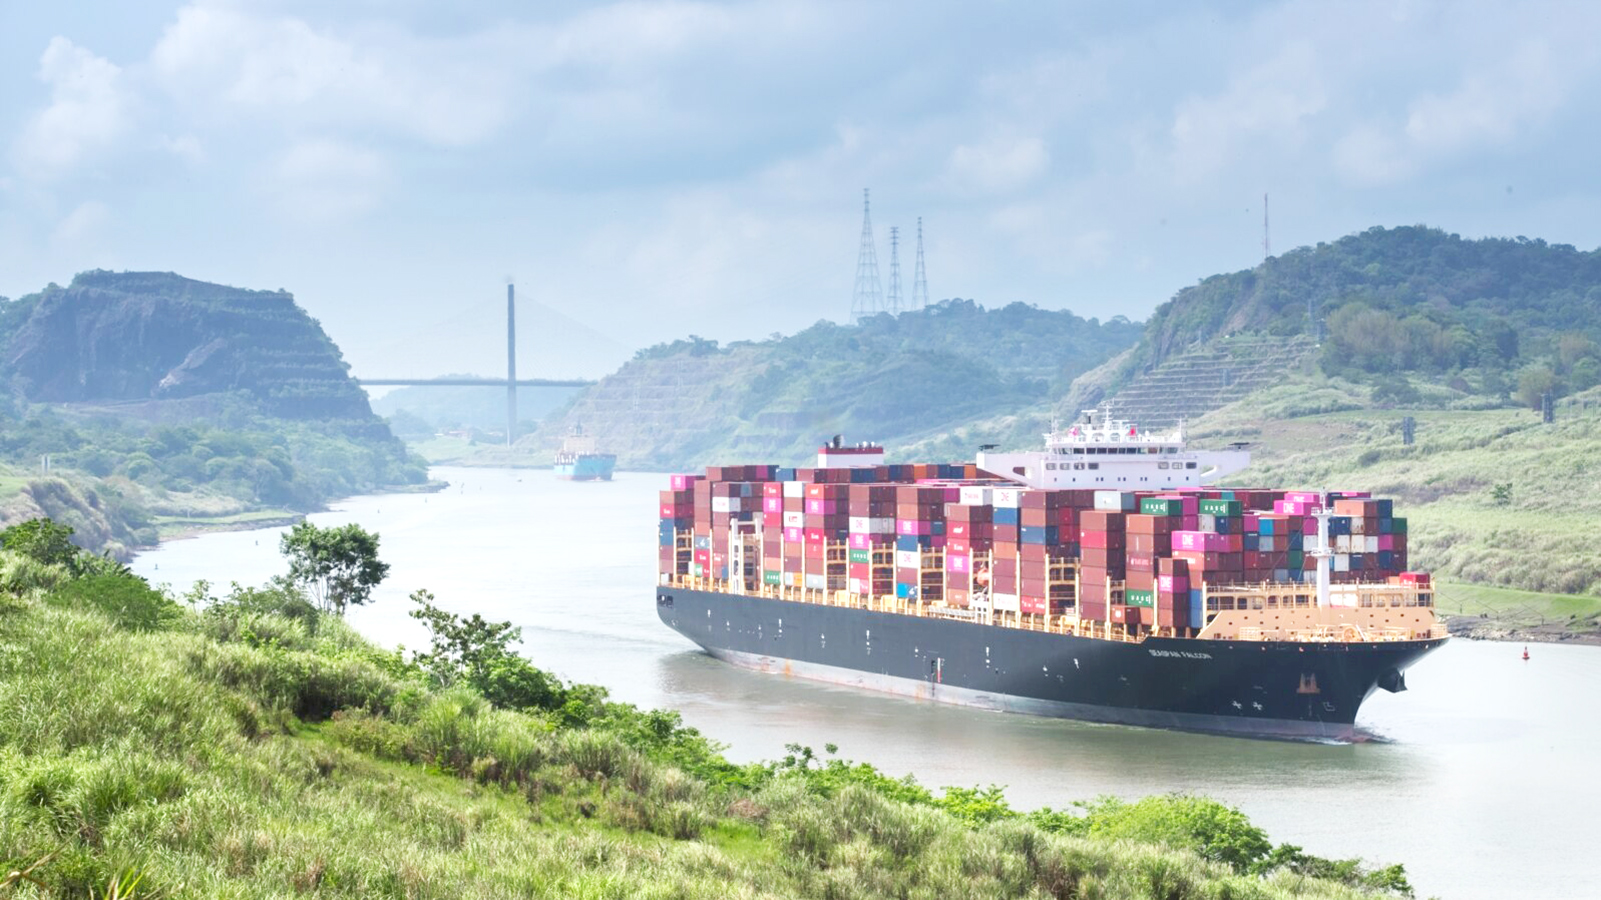

In [5]:
#url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
url = "./img/boat.jpg"
#url = "./img/car.jpg"
#url = "./img/drivingSigns.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(url)
image

In [6]:
get_prompt_response("How many containers are on the boat nearest to us?")


'200'

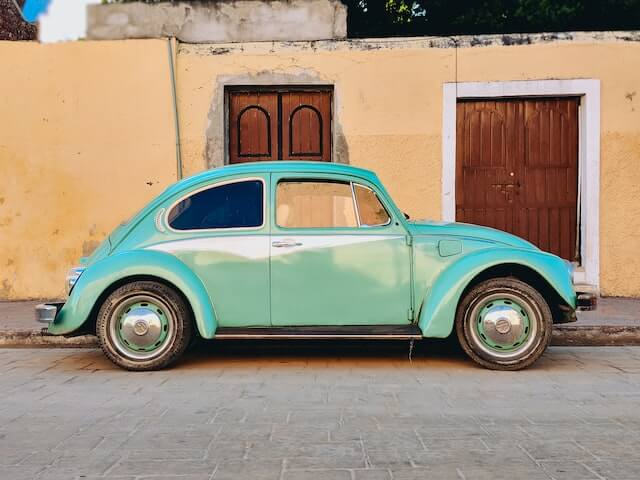

In [7]:
#url = "./img/boat.jpg"
url = "./img/car.jpg"
#url = "./img/drivingSigns.jpg"
#image = Image.open(requests.get(url, stream=True).raw)
image = Image.open(url)
image

In [8]:
get_prompt_response("Describe this scene.")

'In this image we can see a car on the road. In the background, we can see a wall, door, trees and the sky.'

In [9]:
get_prompt_response("What decade is this car from?")

'1960'

In [11]:
get_prompt_response("What is the make and model of this car?")

'volkswagen beetle'

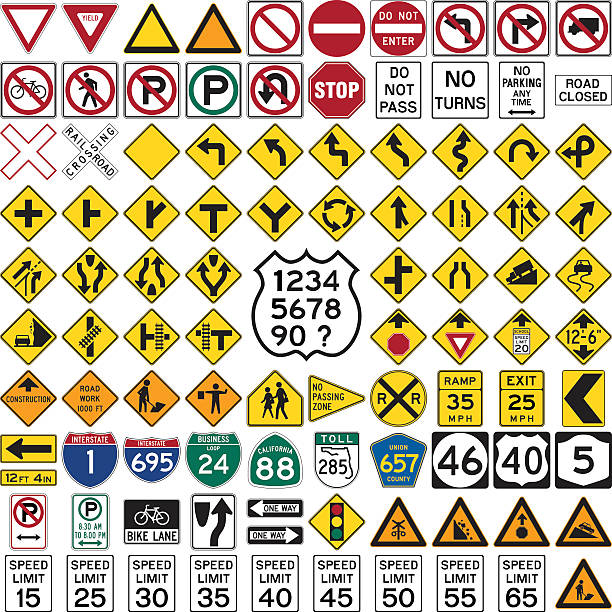

In [12]:
#url = "./img/boat.jpg"
#url = "./img/car.jpg"
url = "./img/drivingSigns.jpg"

image = Image.open(url)
image

In [14]:
get_prompt_response("What does the sign on the bottom left say? What does it mean?")


'speed limit 15'